In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Sales_with_NaNs_v1.3.csv')

In [4]:
def classify_columns(dataframe):
    column_info = {}
    for column in dataframe.columns:
        # Check data type
        dtype = dataframe[column].dtype
        # Classify column
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            column_type = 'Numerical'
        elif pd.api.types.is_categorical_dtype(dataframe[column]) or dataframe[column].nunique() < 20:
            column_type = 'Categorical'
        else:
            column_type = 'Other'
        column_info[column] = column_type
    
    
    print("Column Classification:")
    for col, col_type in column_info.items():
        print(f"{col}: {col_type}")

classify_columns(df)

Column Classification:
Group: Categorical
Customer_Segment: Categorical
Sales_Before: Numerical
Sales_After: Numerical
Customer_Satisfaction_Before: Numerical
Customer_Satisfaction_After: Numerical
Purchase_Made: Categorical


C:\Users\Nura Alom\AppData\Local\Temp\ipykernel_16536\2460339999.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(dataframe[column]) or dataframe[column].nunique() < 20:


Distribution of 'Group':
Group
Control      4300
Treatment    4299
Name: count, dtype: int64

Proportions:
Group
Control      0.500058
Treatment    0.499942
Name: count, dtype: float64


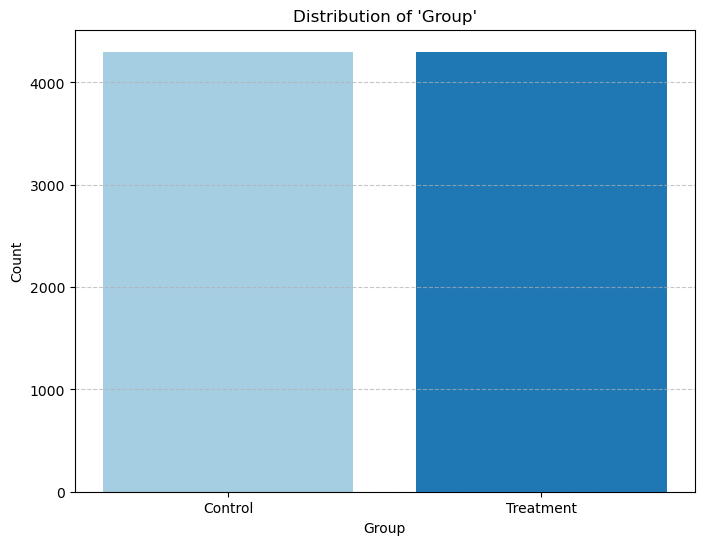

Distribution of 'Customer_Segment':
Customer_Segment
Low Value       2699
Medium Value    2697
High Value      2638
Name: count, dtype: int64

Proportions:
Customer_Segment
Low Value       0.335947
Medium Value    0.335698
High Value      0.328354
Name: count, dtype: float64


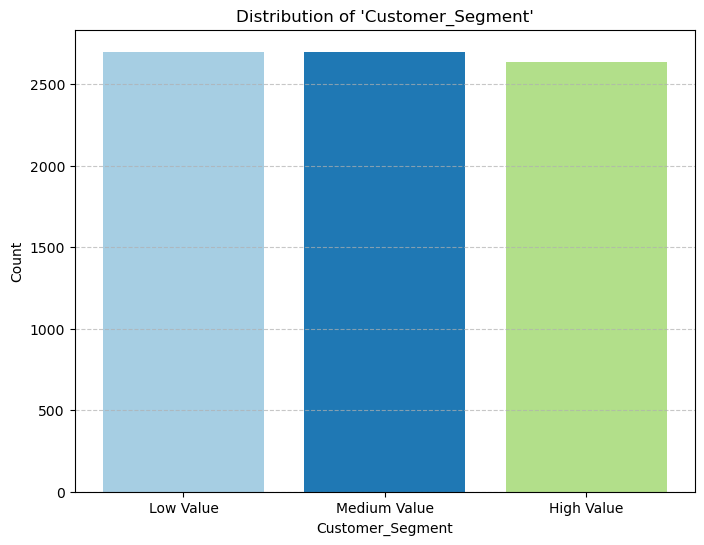

Distribution of 'Purchase_Made':
Purchase_Made
Yes    4667
No     4528
Name: count, dtype: int64

Proportions:
Purchase_Made
Yes    0.507558
No     0.492442
Name: count, dtype: float64


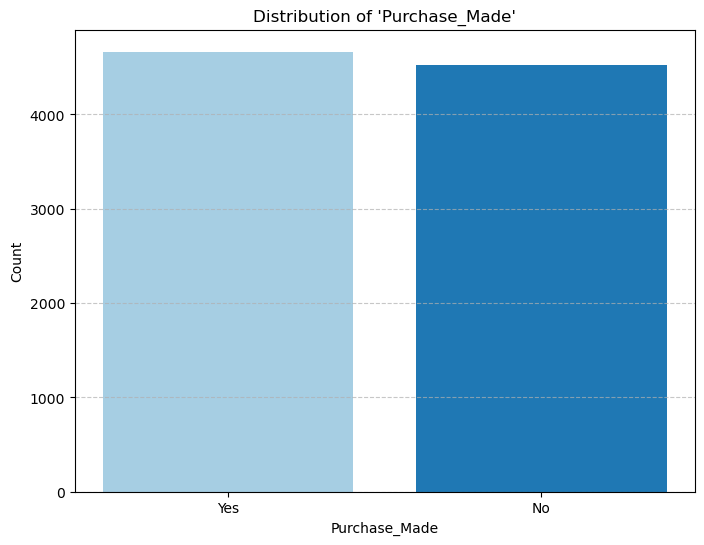

In [5]:
def check_balance_bar(column_name):
    print(f"Distribution of '{column_name}':")
    counts = df[column_name].value_counts()
    print(counts)
    
    print("\nProportions:")
    proportions = counts / counts.sum()
    print(proportions)
    
    # Bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(counts.index, counts.values, color=plt.cm.Paired.colors)
    plt.title(f"Distribution of '{column_name}'")
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Run for the specified columns
check_balance_bar('Group')
check_balance_bar('Customer_Segment')
check_balance_bar('Purchase_Made')



Analysis for Column: Group
           Frequency  Percentage (%)
Group                               
Control         4300       50.005815
Treatment       4299       49.994185
----------------------------------------


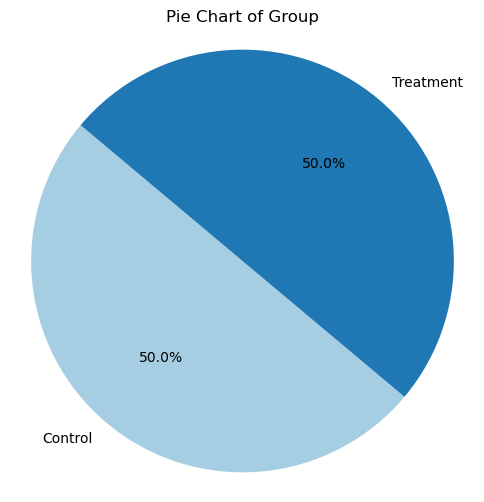


Analysis for Column: Customer_Segment
                  Frequency  Percentage (%)
Customer_Segment                           
Low Value              2699       33.594722
Medium Value           2697       33.569828
High Value             2638       32.835449
----------------------------------------


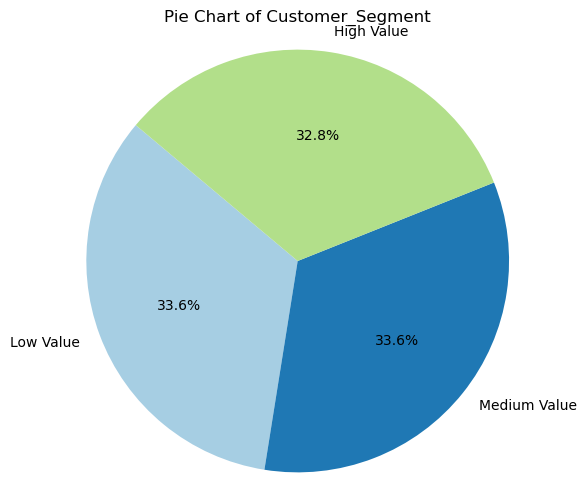


Analysis for Column: Purchase_Made
               Frequency  Percentage (%)
Purchase_Made                           
Yes                 4667       50.755846
No                  4528       49.244154
----------------------------------------


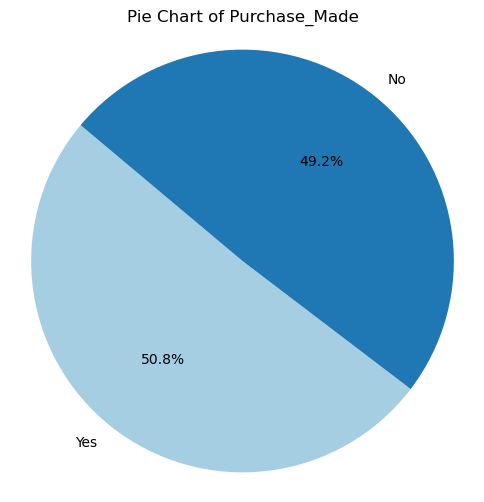

In [6]:
def analyze_categorical_columns_with_plots(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object' or dataframe[column].nunique() < 20:
            print(f"\nAnalysis for Column: {column}")
            
          
            frequency = dataframe[column].value_counts()
            percentage = dataframe[column].value_counts(normalize=True) * 100
            result = pd.DataFrame({
                'Frequency': frequency,
                'Percentage (%)': percentage
            })
            print(result)
            print("-" * 40)
            
            # Pie chart
            plt.figure(figsize=(6, 6))
            plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
            plt.title(f"Pie Chart of {column}")
            plt.axis('equal')  
            plt.show()


analyze_categorical_columns_with_plots(df)

Analysis of Numerical Columns:

Statistics for Column: Sales_Before
Mean: 203.72
Median: 203.32
Variance: 3055.11
Standard Deviation: 55.27
----------------------------------------

Statistics for Column: Sales_After
Mean: 280.46
Median: 273.13
Variance: 7337.56
Standard Deviation: 85.66
----------------------------------------

Statistics for Column: Customer_Satisfaction_Before
Mean: 70.25
Median: 69.49
Variance: 287.54
Standard Deviation: 16.96
----------------------------------------

Statistics for Column: Customer_Satisfaction_After
Mean: 73.87
Median: 73.84
Variance: 328.64
Standard Deviation: 18.13
----------------------------------------


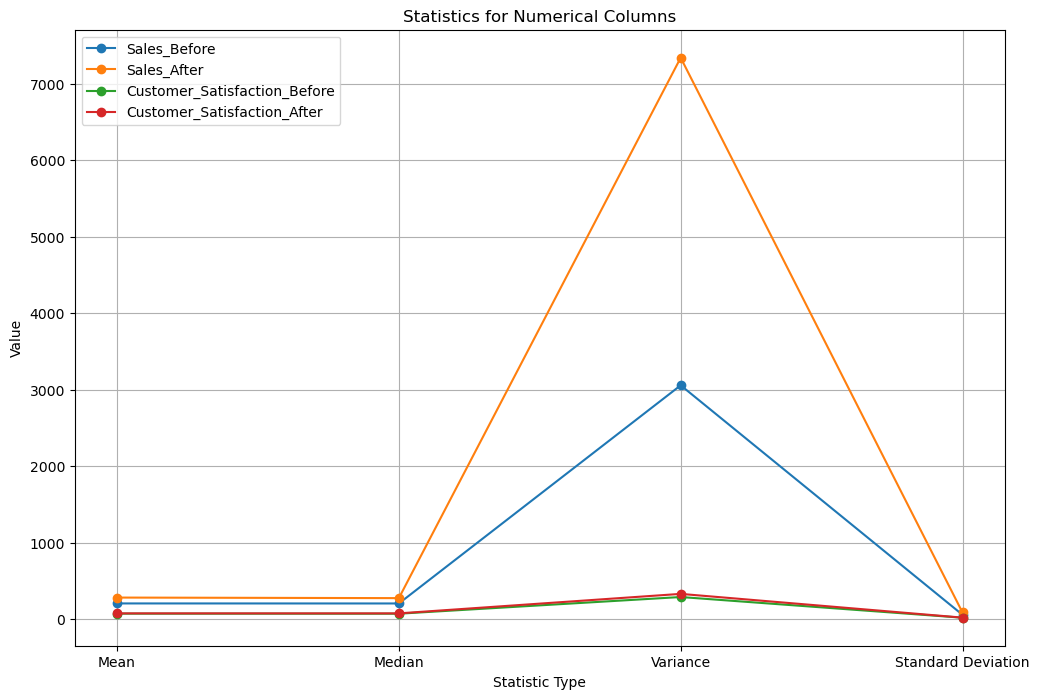

In [7]:
def analyze_and_plot_numerical_columns(dataframe):
    print("Analysis of Numerical Columns:")
    
    # Create a figure for the plots
    plt.figure(figsize=(12, 8))

    for column in dataframe.columns:
        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Calculate statistics
            mean_val = dataframe[column].mean()
            median_val = dataframe[column].median()
            variance_val = dataframe[column].var()
            std_dev_val = dataframe[column].std()
            
            # Print statistics
            print(f"\nStatistics for Column: {column}")
            print(f"Mean: {mean_val:.2f}")
            print(f"Median: {median_val:.2f}")
            print(f"Variance: {variance_val:.2f}")
            print(f"Standard Deviation: {std_dev_val:.2f}")
            print("-" * 40)
            
            # Plot the statistics for the column
            plt.plot([1, 2, 3, 4], [mean_val, median_val, variance_val, std_dev_val], marker='o', label=column)
    
    # Set up plot
    plt.title("Statistics for Numerical Columns")
    plt.xlabel("Statistic Type")
    plt.ylabel("Value")
    plt.xticks([1, 2, 3, 4], ['Mean', 'Median', 'Variance', 'Standard Deviation'])
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Call the function
analyze_and_plot_numerical_columns(df)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('Sales_with_NaNs_v1.3.csv')

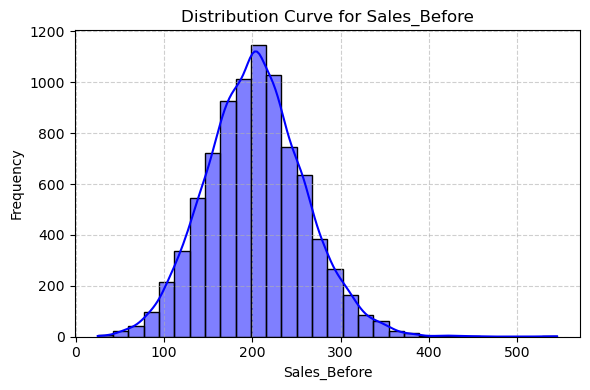

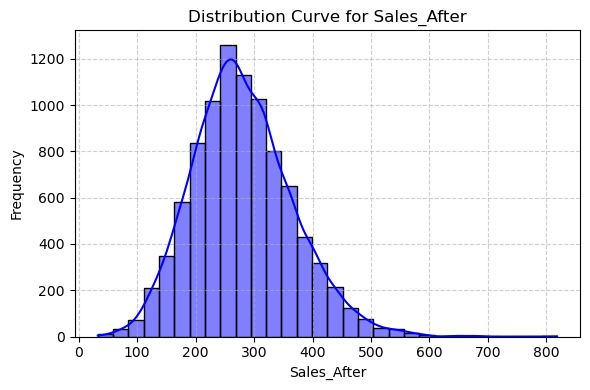

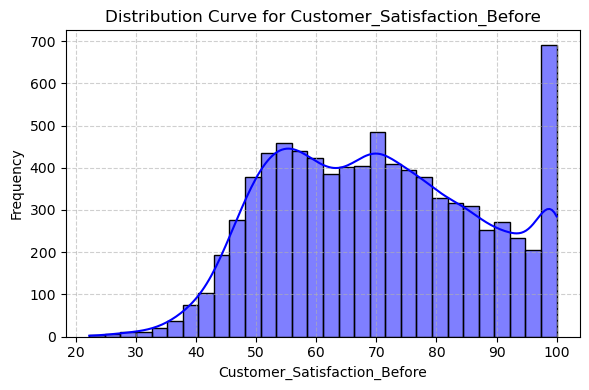

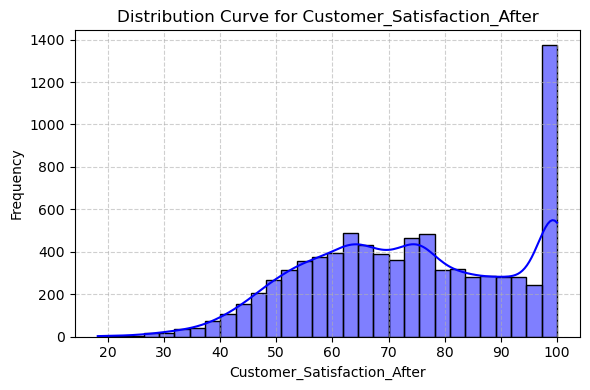


Range (Min and Max) for Each Numeric Column:

     Sales_Before  Sales_After  Customer_Satisfaction_Before  \
min     24.852966    32.414352                     22.202441   
max    545.422547   818.219997                    100.000000   

     Customer_Satisfaction_After  
min                    18.224938  
max                   100.000000  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns  # <-- Add this line

# Select only numeric columns
numeric_cols = [
    "Sales_Before",
    "Sales_After",
    "Customer_Satisfaction_Before",
    "Customer_Satisfaction_After"
]

# Plot distribution (with KDE curve) for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue', bins=30)  # bins=30 for smoother curve
    plt.title(f"Distribution Curve for {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Find the range (min and max) for each numeric column
ranges = df[numeric_cols].agg(['min', 'max'])
print("\nRange (Min and Max) for Each Numeric Column:\n")
print(ranges)

In [4]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            # Categorical column — fill with mode
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Numerical column — fill with mean
            df[col] = df[col].fillna(df[col].mean())

In [5]:
df[df.isnull().any(axis=1)]

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made


In [6]:
df['Group'] = df['Group'].map({'Control': 0, 'Treatment': 1})
df['Purchase_Made'] = df['Purchase_Made'].map({'No': 0, 'Yes': 1})

# Ordinal encoding for Customer_Segment
segment_order = {'Low Value': 0, 'Medium Value': 1, 'High Value': 2}
df['Customer_Segment'] = df['Customer_Segment'].map(segment_order)

In [7]:
print(df.head())

   Group  Customer_Segment  Sales_Before  Sales_After  \
0      0                 2    240.548359   300.007568   
1      1                 2    246.862114   381.337555   
2      0                 2    156.978084   179.330464   
3      0                 1    192.126708   229.278031   
4      0                 2    229.685623   280.457952   

   Customer_Satisfaction_Before  Customer_Satisfaction_After  Purchase_Made  
0                     74.684767                    73.872593              0  
1                    100.000000                   100.000000              1  
2                     98.780735                   100.000000              0  
3                     49.333766                    39.811841              1  
4                     83.974852                    87.738591              1  


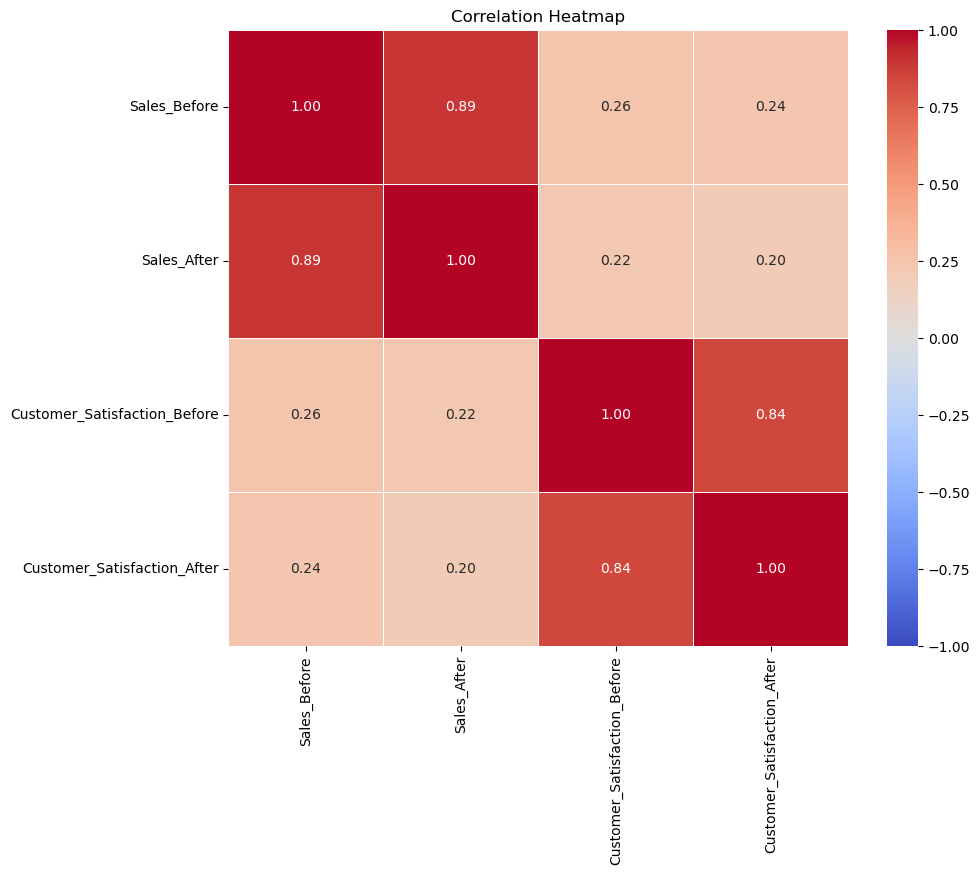

In [9]:
import seaborn as sns
def plot_correlation_heatmap(dataframe):
    # Select only numerical columns
    numerical_columns = dataframe.select_dtypes(include=['number']).columns

    # Calculate the correlation matrix for numerical columns
    corr_matrix = dataframe[numerical_columns].corr()

    # Plot the heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

    # Set the title of the plot
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(df)

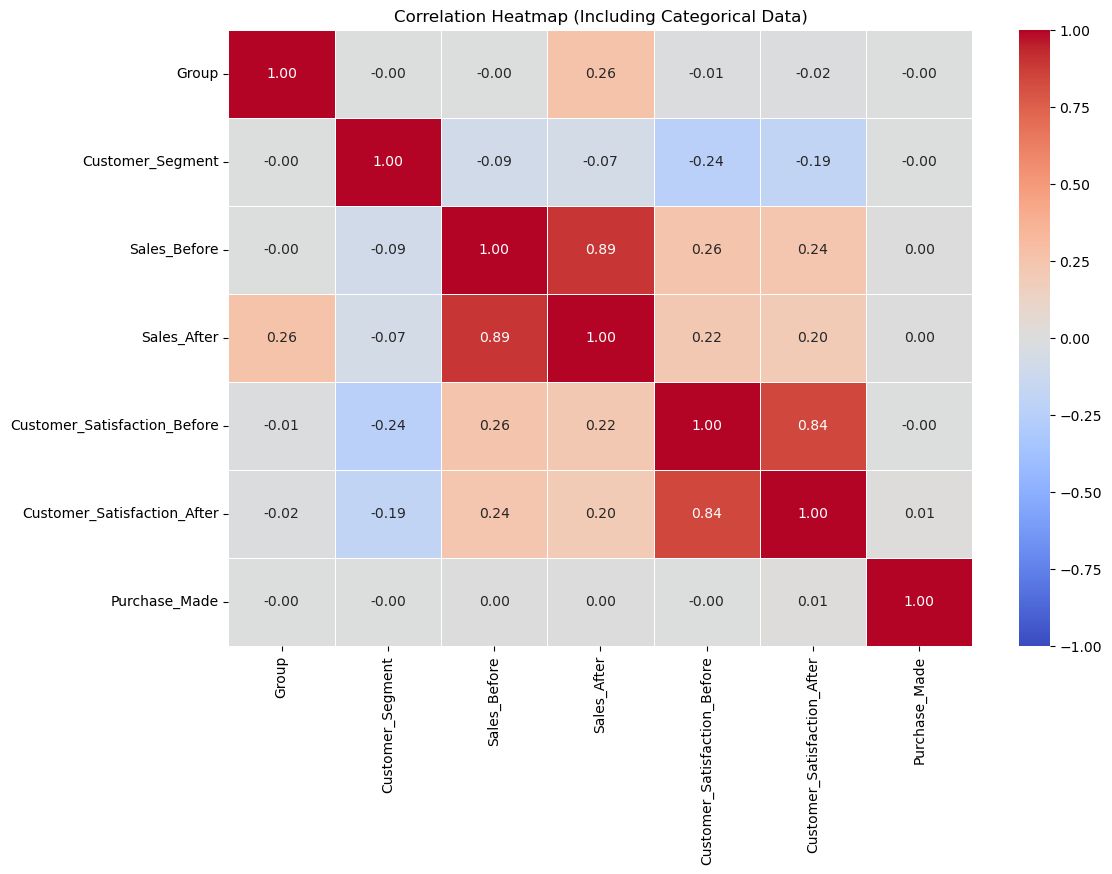

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(dataframe):
    le = LabelEncoder()  # Initialize the label encoder
    categorical_columns = dataframe.select_dtypes(include=['object']).columns  # Identify categorical columns
    
    for column in categorical_columns:
        dataframe[column] = le.fit_transform(dataframe[column])  # Apply label encoding
    
    return dataframe


df_encoded = encode_categorical_columns(df)


def plot_correlation_heatmap(dataframe):
    corr_matrix = dataframe.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

    plt.title("Correlation Heatmap (Including Categorical Data)")
    plt.show()


plot_correlation_heatmap(df_encoded)

<Axes: xlabel='Purchase_Made', ylabel='count'>

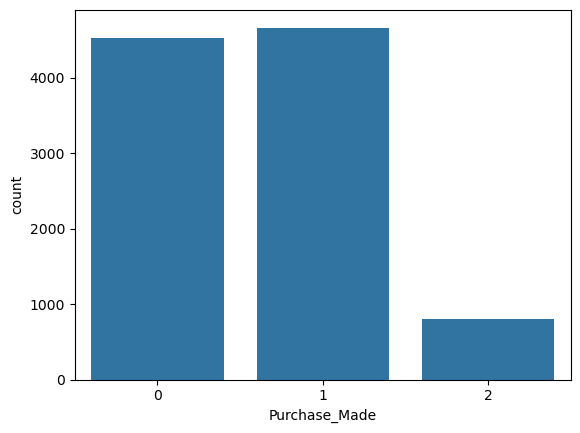

In [11]:
import seaborn as sns
sns.countplot(x='Purchase_Made', data=df)


In [12]:
print(df['Purchase_Made'].value_counts())


Purchase_Made
1    4667
0    4528
2     805
Name: count, dtype: int64


In [13]:
df[df.isnull().any(axis=1)]


,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,0,0,240.548359,300.007568,74.684767,NaN,0
4,2,0,229.685623,NaN,83.974852,87.738591,1
10,0,1,139.931539,170.238396,59.844766,NaN,1
11,0,0,NaN,333.064972,74.383939,67.942403,2
12,0,3,211.834937,254.843912,NaN,87.601544,1
...,...,...,...,...,...,...,...
9991,2,2,191.021621,295.549750,71.148028,NaN,0
9994,2,1,113.736701,177.749874,59.819753,NaN,1
9997,1,1,208.107142,322.893351,55.915870,NaN,0
9998,1,2,NaN,431.974901,66.082462,81.274030,0


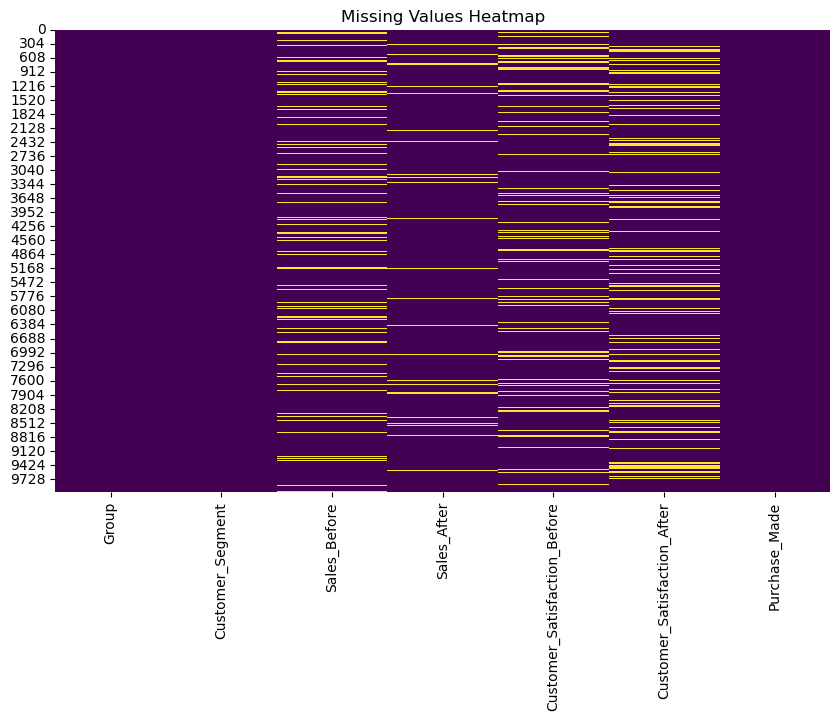

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [15]:
df.describe()


,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
count,10000.000000,10000.000000,8478.000000,9233.000000,8330.000000,8360.000000,10000.000000
mean,0.710100,1.399100,203.716998,280.457952,70.252076,73.872593,0.627700
std,0.697213,1.077374,55.273059,85.659543,16.957010,18.128351,0.628277
min,0.000000,0.000000,24.852966,32.414352,22.202441,18.224938,0.000000
25%,0.000000,0.000000,166.629232,221.436990,56.365513,59.925030,0.000000
50%,1.000000,1.000000,203.323607,273.129170,69.490898,73.844594,1.000000
75%,1.000000,2.000000,238.809147,332.570108,83.426798,90.044365,1.000000
max,2.000000,3.000000,545.422547,818.219997,100.000000,100.000000,2.000000


In [18]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].unique()}")



In [ ]:
# For numerical columns only, get min and max
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    print(f"Range for '{col}': {df[col].min()} to {df[col].max()}")


In [20]:
print(df.head())  # Check if df has been loaded properly
print(df.dtypes)  # Check data types of columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Check if there are categorical columns
if len(categorical_cols) == 0:
    print("No categorical columns found.")
else:
    for col in categorical_cols:
        print(f"\nCategories for '{col}': {df[col].unique()}")



   Group  Customer_Segment  Sales_Before  Sales_After  \
0      0                 0    240.548359   300.007568   
1      1                 0    246.862114   381.337555   
2      0                 0    156.978084   179.330464   
3      0                 2    192.126708   229.278031   
4      2                 0    229.685623          NaN   

   Customer_Satisfaction_Before  Customer_Satisfaction_After  Purchase_Made  
0                     74.684767                          NaN              0  
1                    100.000000                   100.000000              1  
2                     98.780735                   100.000000              0  
3                     49.333766                    39.811841              1  
4                     83.974852                    87.738591              1  
Group                             int32
Customer_Segment                  int32
Sales_Before                    float64
Sales_After                     float64
Customer_Satisfaction_Before 